In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


/kaggle/input/property-prices-in-tunisia/Property Prices in Tunisia.csv


In [2]:
df=pd.read_csv("/kaggle/input/property-prices-in-tunisia/Property Prices in Tunisia.csv")

In [3]:
col=['room_count','bathroom_count','size', 'price','log_price']
df.mask(df[col] < 0,inplace=True)

In [4]:
df[col]=df[col].astype(np.float32)

In [5]:
df.dropna(inplace=True)

In [6]:
df.drop(["city","region","log_price"], axis=1,inplace=True)

In [7]:
df.head()

,category,room_count,bathroom_count,size,type,price
2,Appartements,2.0,1.0,80.0,À Louer,380.0
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0
6,Appartements,2.0,1.0,100.0,À Louer,670.0


In [8]:
df_rent=df[df.type=="À Louer"]
df_sell=df[df.type=="À Vendre"]

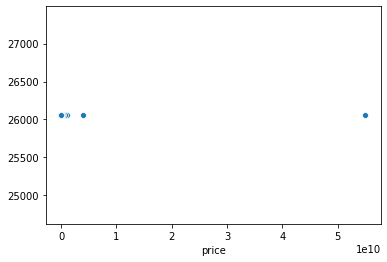

In [9]:
sns.scatterplot(df_sell.price,df_sell.size)

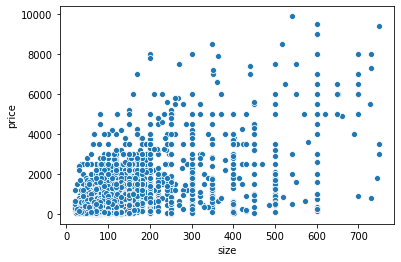

In [10]:
sns.scatterplot(df_rent[(df_rent["size"]<800) & (df_rent["price"]<10000)]["size"],df_rent[(df_rent["size"]<800) & (df_rent["price"]<10000)]["price"])

In [11]:
df_rent.shape

(4990, 6)

Продажа

In [12]:
np.percentile(df_sell["price"].values,[1,99])

array([2.70000000e+04, 1.08455204e+08])

In [13]:
np.percentile(df_sell["size"].values,[1,99])

array([  30., 1100.])

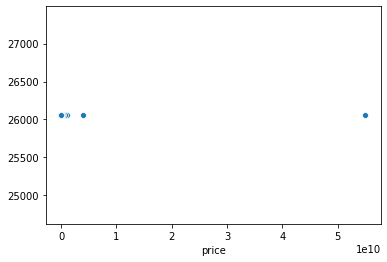

In [14]:
sns.scatterplot(df_sell.price,df_sell.size)

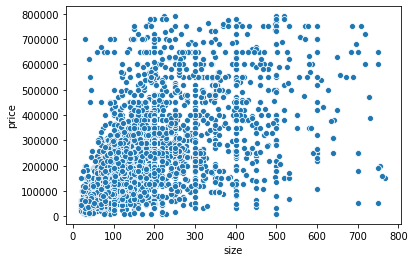

In [15]:
sns.scatterplot(df_sell[(df_sell["size"]<800) & (df_sell["price"]<800000)]["size"],df_sell[(df_sell["size"]<800) & (df_sell["price"]<800000)]["price"])

In [16]:
df_sell.shape

(4343, 6)

In [17]:
X_sell=pd.get_dummies(df_sell[(df_sell["size"]<800) & (df_sell["price"]<800000)].drop(columns=['price'])).values
y_sell=df_sell[(df_sell["size"]<800) & (df_sell["price"]<800000)].price.values

In [18]:
X_train_sell, X_test_sell, y_train_sell, y_test_sell = train_test_split(X_sell, y_sell, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly_sell = polynomial_features.fit_transform(X_train_sell)

model = LinearRegression()
model.fit(x_poly_sell, y_train_sell)
y_poly_pred_sell = model.predict(x_poly_sell)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_sell = np.sqrt(mean_squared_error(y_train_sell,y_poly_pred_sell))
r2_sell = r2_score(y_train_sell,y_poly_pred_sell)
print("RMSE",rmse_sell)
print("R2",r2_sell)

RMSE 115749.43
R2 0.4755372084662798


In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train_sell,y_train_sell)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred_sell = regressor.predict(X_test_sell)

In [23]:
print('mean_squared_error: ',mean_squared_error(y_test_sell, y_pred_sell),
     '\nr2_score: ',r2_score(y_test_sell, y_pred_sell))

mean_squared_error:  20046727886.84763 
r2_score:  0.25087557322401166


linear=0.25

poly=0.021

rbf=-0.04

sigmoid=-0.042